In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['savefig.bbox'] = 'tight'
import seaborn as sb
import numpy as np
from plotter import *
import pandas as pd
import glob
import os
from pygenesys.utils.growth_model import *

In [2]:
files = glob.glob('data/results/objective_value_**_V2.csv')
files.sort()
files

['data/results/objective_value_LC_V2.csv',
 'data/results/objective_value_XN_V2.csv',
 'data/results/objective_value_ZAN_V2.csv',
 'data/results/objective_value_ZN_V2.csv']

In [7]:
obj_dict = {}
for fname in files:
    scenario = fname.strip('.csv').split('_')[-2]
    obj_df = pd.read_csv(fname)
    data = np.array(obj_df['Objective_Value'])
    obj_dict[scenario] = data
#     print(obj_df)
# print(obj_dict)
df = pd.DataFrame(obj_dict)
df

,LC,XN,ZAN,ZN
0,131746.403869,156221.644879,156221.644880,182390.601444
1,131503.695325,152978.632488,152978.632485,177991.471277
2,131311.153961,157709.649171,157709.649167,184183.020722
3,131375.315240,154773.396960,154773.396983,180761.609373
4,131828.548275,159020.901028,159020.901025,186010.866883
...,...,...,...,...
117,132069.261558,161912.096378,162098.078715,190799.469411
118,132668.701118,161385.122481,161387.731508,189451.761693
119,132237.766942,156198.017837,156198.017837,182607.510786
120,132482.041840,160746.359625,160746.359626,188577.473910


In [8]:
# get the total demand
annual_demand = linear_growth(1.87e5, 2025, 2050, 6, 0.01) # GWh
tot_gwh = annual_demand.sum()

In [9]:
annual_demand

array([187000., 196350., 205700., 215050., 224400., 233750.])

In [10]:
bau_cost = 90100.9761217599/tot_gwh*1000

Text(0.5, 1.0, 'Variability of Electricity Cost')

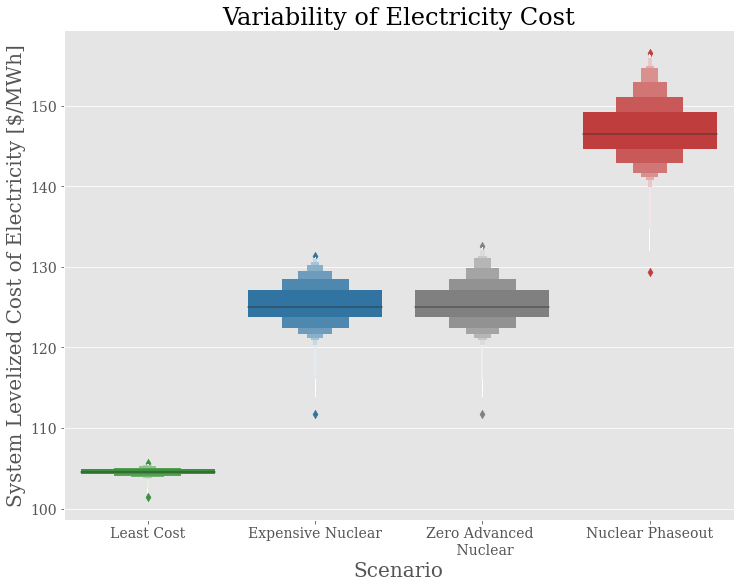

In [13]:
ax = sb.boxenplot(data = df/tot_gwh*1000, palette={'LC':'tab:green',
                                                   'XN':'tab:blue',
                                                   'ZAN':'gray',
                                                   'ZN':'tab:red'})
ax.set_xlabel('Scenario', fontsize=20)
labels = {0:'Least Cost', 1:'Expensive Nuclear', 2:'Zero Advanced \n Nuclear', 3:'Nuclear Phaseout'}
plt.xticks(list(labels.keys()), list(labels.values()), fontsize=14)
plt.yticks(fontsize=14)
ax.set_ylabel('System Levelized Cost of Electricity [$/MWh]', fontsize=20)
# ax.axhline(y=((125+121)/2), color='gray', linestyle='--')
# ax.axhline(y=((109+106)/2), color='gray', linestyle='--')
# ax.axhline(y=bau_cost, color='k', linestyle='--')
# ax.annotate(r'Business as Usual Cost of Electricity: $\frac{\$71.38}{MWh}$', xy=(0.5,73), fontsize=16)
ax.set_title('Variability of Electricity Cost', fontsize=24)

In [8]:
(df/tot_gwh*1000).describe()

,LC,XN,ZAN,ZN
count,101.000000,101.000000,101.000000,101.000000
mean,104.252805,116.255901,116.255901,134.017663
std,0.942351,2.651169,2.651169,3.500519
min,101.387491,109.937536,109.937536,125.516362
25%,103.532436,114.278504,114.278504,131.422404
50%,104.241829,115.948745,115.948745,133.671898
75%,104.823954,118.264291,118.264291,136.649721
max,106.427746,121.448294,121.448294,141.415300


In [9]:
90100.9761217599/tot_gwh*1000

71.38124469935426